In [1]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


# 1. PREPROCESSING DATA

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

> Load Dataset

In [3]:
file_path = 'online_course_engagement_data.csv'
df_1 = pd.read_csv(file_path)
df_1

,UserID,CourseCategory,TimeSpentOnCourse,NumberOfVideosWatched,NumberOfQuizzesTaken,QuizScores,CompletionRate,DeviceType,CourseCompletion
0,5618,Health,29.979719,17,3,50.365656,20.860773,1,0
1,4326,Arts,27.802640,1,5,62.615970,65.632415,1,0
2,5849,Arts,86.820485,14,2,78.458962,63.812007,1,1
3,4992,Science,35.038427,17,10,59.198853,95.433162,0,1
4,3866,Programming,92.490647,16,0,98.428285,18.102478,0,0
...,...,...,...,...,...,...,...,...,...
8995,8757,Health,37.445225,14,4,54.469359,32.990704,1,0
8996,894,Science,48.631443,7,7,59.413257,0.254625,0,0
8997,6323,Health,38.212512,3,3,69.508297,70.188159,1,0
8998,3652,Health,70.048665,13,10,79.655182,72.975225,1,1


> Data Description 

Description:
This dataset captures user engagement metrics from an online course platform, facilitating analyses on factors influencing course completion. It includes user demographics, course-specific data, and engagement metrics.

Features:
1. UserID: Unique identifier for each user
2. CourseCategory: Category of the course taken by the user (e.g., Programming, Business, Arts)
3. TimeSpentOnCourse: Total time spent by the user on the course in hours
4. NumberOfVideosWatched: Total number of videos watched by the user
5. NumberOfQuizzesTaken: Total number of quizzes taken by the user
6. QuizScores: Average scores achieved by the user in quizzes (percentage)
7. CompletionRate: Percentage of course content completed by the user
8. DeviceType: Type of device used by the user (Device Type: Desktop (0) or Mobile (1))
9. CourseCompletion (Target Variable): Course completion status (0: Not Completed, 1: Completed)

Target:
Distribution of the Target Variable (CourseCompletion):

0 (Not Completed): 48%
1 (Completed): 52%

In [4]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   UserID                 9000 non-null   int64  
 1   CourseCategory         9000 non-null   object 
 2   TimeSpentOnCourse      9000 non-null   float64
 3   NumberOfVideosWatched  9000 non-null   int64  
 4   NumberOfQuizzesTaken   9000 non-null   int64  
 5   QuizScores             9000 non-null   float64
 6   CompletionRate         9000 non-null   float64
 7   DeviceType             9000 non-null   int64  
 8   CourseCompletion       9000 non-null   int64  
dtypes: float64(3), int64(5), object(1)
memory usage: 632.9+ KB


In [5]:
df_1.describe()

,UserID,TimeSpentOnCourse,NumberOfVideosWatched,NumberOfQuizzesTaken,QuizScores,CompletionRate,DeviceType,CourseCompletion
count,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000
mean,4498.894556,50.163822,10.024667,5.090556,74.706028,50.340146,0.500667,0.396444
std,2596.849433,28.491750,6.029878,3.157762,14.378383,28.950977,0.500027,0.489186
min,1.000000,1.005230,0.000000,0.000000,50.005119,0.009327,0.000000,0.000000
25%,2251.750000,25.440548,5.000000,2.000000,62.283451,25.653614,0.000000,0.000000
50%,4483.500000,49.818417,10.000000,5.000000,74.743294,50.264124,1.000000,0.000000
75%,6751.250000,75.069924,15.000000,8.000000,87.022663,75.572493,1.000000,1.000000
max,9000.000000,99.992558,20.000000,10.000000,99.994984,99.979711,1.000000,1.000000


> This dataset has 9000 rows and 9 columns with the column "CourseCompletion" being the target column of the currently used dataset.

## Checking and Handling Missing Value

In [6]:
df_1.isnull().sum()

UserID                   0
CourseCategory           0
TimeSpentOnCourse        0
NumberOfVideosWatched    0
NumberOfQuizzesTaken     0
QuizScores               0
CompletionRate           0
DeviceType               0
CourseCompletion         0
dtype: int64

> The dataset does not have missing values, so it does not require a handling process for missing values.


## Checking and Handling Duplicated Values

In [7]:
df_1[df_1.duplicated(keep='first')]

,UserID,CourseCategory,TimeSpentOnCourse,NumberOfVideosWatched,NumberOfQuizzesTaken,QuizScores,CompletionRate,DeviceType,CourseCompletion
351,7812,Programming,76.319366,0,9,67.509219,9.355098,1,0
383,17,Science,60.902054,4,10,82.143128,48.550331,1,0
444,4293,Health,4.179856,15,6,64.887538,20.909773,1,0
456,8734,Science,93.461459,6,7,78.610963,2.316283,0,0
503,5995,Business,19.671294,2,4,95.233215,37.351241,1,0
...,...,...,...,...,...,...,...,...,...
8978,6019,Arts,37.018679,9,9,65.691820,32.681460,1,0
8980,4184,Science,11.943595,8,1,65.577109,38.610706,1,0
8982,6474,Health,72.200459,5,1,73.765609,68.512431,1,0
8986,5835,Arts,96.596947,0,5,67.184059,20.690352,0,0


In [8]:
df_2 = df_1.drop_duplicates(keep='first')
df_2

,UserID,CourseCategory,TimeSpentOnCourse,NumberOfVideosWatched,NumberOfQuizzesTaken,QuizScores,CompletionRate,DeviceType,CourseCompletion
0,5618,Health,29.979719,17,3,50.365656,20.860773,1,0
1,4326,Arts,27.802640,1,5,62.615970,65.632415,1,0
2,5849,Arts,86.820485,14,2,78.458962,63.812007,1,1
3,4992,Science,35.038427,17,10,59.198853,95.433162,0,1
4,3866,Programming,92.490647,16,0,98.428285,18.102478,0,0
...,...,...,...,...,...,...,...,...,...
8995,8757,Health,37.445225,14,4,54.469359,32.990704,1,0
8996,894,Science,48.631443,7,7,59.413257,0.254625,0,0
8997,6323,Health,38.212512,3,3,69.508297,70.188159,1,0
8998,3652,Health,70.048665,13,10,79.655182,72.975225,1,1


> Dataset 'df_1' has 877 duplicate values without including the first row of each duplicate set. Then the 877 rows that have duplicate values are deleted and a new dataset is created, namely 'df_2' with a total of 8,123 rows.

## Checking and Handling Outliers

In [9]:
kolom_kolom = [
    'TimeSpentOnCourse',
    'NumberOfVideosWatched',
    'NumberOfQuizzesTaken',
    'QuizScores',
    'CompletionRate'
]

batas_kolom = {}

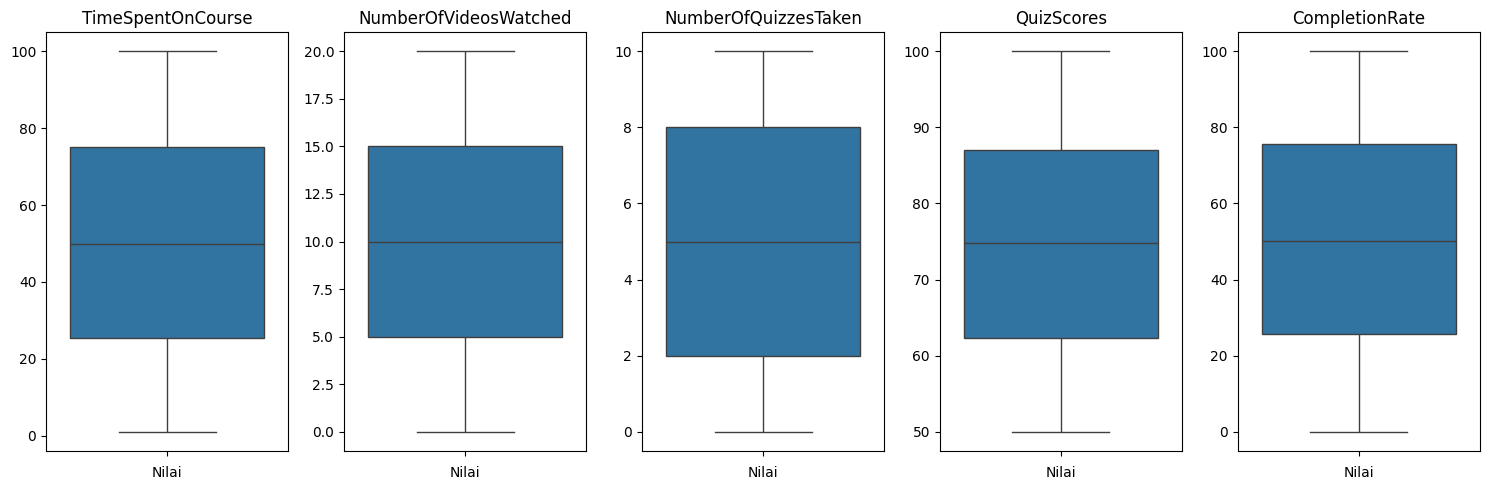

In [10]:
fig, axes = plt.subplots(nrows=1, ncols=len(kolom_kolom), figsize=(15, 5))

for i, kolom in enumerate(kolom_kolom):
    sns.boxplot(y=df_1[kolom], ax=axes[i])
    axes[i].set_title(f'{kolom}')
    axes[i].set_xlabel('Nilai')
    axes[i].set_ylabel('')

plt.tight_layout()
plt.show()

> Based on checking outliers by displaying boxplots of the selected columns, there are no outliers in these columns. Therefore, handling of outliers will not be done.

## Checking and Handling Imbalance Data

In [11]:
df_2['CourseCompletion'].value_counts()

CourseCompletion
0    4555
1    3568
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

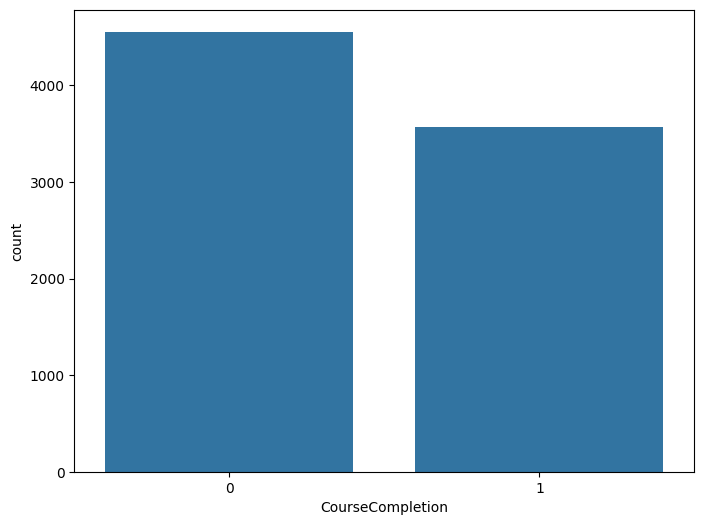

In [12]:
plt.figure(figsize=(8, 6))
sns.countplot(x = df_2['CourseCompletion'])
plt.show

> Comparison of the sum of each class of the target column by :
> 
> 0 = 56,1%
>
> 1 = 43,9%
>
> This comparison does not oversample or undersample to equalise the number of each class.

## Exploratory Data Analyst

In [13]:
df_2

,UserID,CourseCategory,TimeSpentOnCourse,NumberOfVideosWatched,NumberOfQuizzesTaken,QuizScores,CompletionRate,DeviceType,CourseCompletion
0,5618,Health,29.979719,17,3,50.365656,20.860773,1,0
1,4326,Arts,27.802640,1,5,62.615970,65.632415,1,0
2,5849,Arts,86.820485,14,2,78.458962,63.812007,1,1
3,4992,Science,35.038427,17,10,59.198853,95.433162,0,1
4,3866,Programming,92.490647,16,0,98.428285,18.102478,0,0
...,...,...,...,...,...,...,...,...,...
8995,8757,Health,37.445225,14,4,54.469359,32.990704,1,0
8996,894,Science,48.631443,7,7,59.413257,0.254625,0,0
8997,6323,Health,38.212512,3,3,69.508297,70.188159,1,0
8998,3652,Health,70.048665,13,10,79.655182,72.975225,1,1


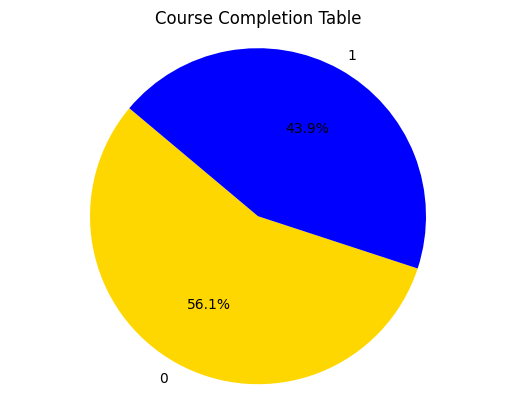

In [14]:
sizes = df_2['CourseCompletion'].value_counts() 
labels = sizes.index.astype(str)
colors = ['gold','blue']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Course Completion Table')
plt.axis('equal')
plt.show()


Of the 8,123 participants who took the course, 43.9% were able to complete the course and the remaining 56.1% were unable to complete the course.

C:\Users\SUPER USER\AppData\Local\Temp\ipykernel_11608\3893320140.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='CourseCategory', data=df_2, order=order, palette='magma', ax=ax)


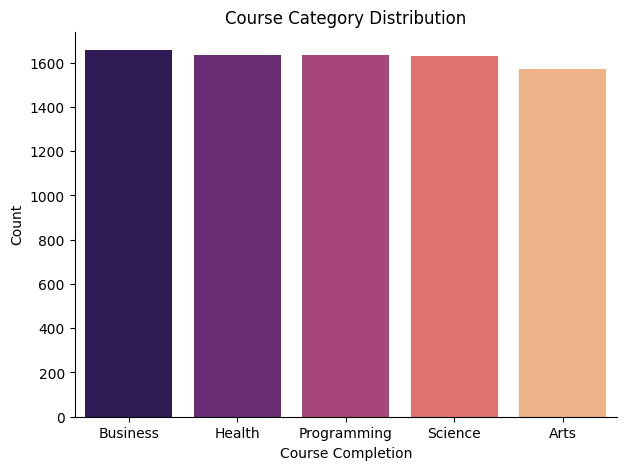

In [15]:
order = df_2['CourseCategory'].value_counts().index
f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)
sns.countplot(x='CourseCategory', data=df_2, order=order, palette='magma', ax=ax)
ax.set_title('Course Category Distribution')
ax.set_xlabel('Course Completion')
ax.set_ylabel('Count')
plt.show()

The course category with the most participants was health courses and the course with the fewest participants was arts courses. 

## Feature Engineering

### Feature Encoding

In [16]:
df_3 = df_2.copy()
df_3

,UserID,CourseCategory,TimeSpentOnCourse,NumberOfVideosWatched,NumberOfQuizzesTaken,QuizScores,CompletionRate,DeviceType,CourseCompletion
0,5618,Health,29.979719,17,3,50.365656,20.860773,1,0
1,4326,Arts,27.802640,1,5,62.615970,65.632415,1,0
2,5849,Arts,86.820485,14,2,78.458962,63.812007,1,1
3,4992,Science,35.038427,17,10,59.198853,95.433162,0,1
4,3866,Programming,92.490647,16,0,98.428285,18.102478,0,0
...,...,...,...,...,...,...,...,...,...
8995,8757,Health,37.445225,14,4,54.469359,32.990704,1,0
8996,894,Science,48.631443,7,7,59.413257,0.254625,0,0
8997,6323,Health,38.212512,3,3,69.508297,70.188159,1,0
8998,3652,Health,70.048665,13,10,79.655182,72.975225,1,1


In [17]:
df_3.nunique()

UserID                   8123
CourseCategory              5
TimeSpentOnCourse        8123
NumberOfVideosWatched      21
NumberOfQuizzesTaken       11
QuizScores               8123
CompletionRate           8123
DeviceType                  2
CourseCompletion            2
dtype: int64

In [18]:
category_mapping = {
    'Health': 1,
    'Arts': 2,
    'Science': 3,
    'Programming': 4,
    'Business' : 5
}
df_3['CourseCategory_encoded'] = df_3['CourseCategory'].map(category_mapping)
df_4 = df_3.drop(columns=['CourseCategory'])
df_4

,UserID,TimeSpentOnCourse,NumberOfVideosWatched,NumberOfQuizzesTaken,QuizScores,CompletionRate,DeviceType,CourseCompletion,CourseCategory_encoded
0,5618,29.979719,17,3,50.365656,20.860773,1,0,1
1,4326,27.802640,1,5,62.615970,65.632415,1,0,2
2,5849,86.820485,14,2,78.458962,63.812007,1,1,2
3,4992,35.038427,17,10,59.198853,95.433162,0,1,3
4,3866,92.490647,16,0,98.428285,18.102478,0,0,4
...,...,...,...,...,...,...,...,...,...
8995,8757,37.445225,14,4,54.469359,32.990704,1,0,1
8996,894,48.631443,7,7,59.413257,0.254625,0,0,3
8997,6323,38.212512,3,3,69.508297,70.188159,1,0,1
8998,3652,70.048665,13,10,79.655182,72.975225,1,1,1


Create a new column named 'CourseCategory_encoded' that contains the values from the 'CourseCategory' column and convert the values into categorical data, as follows: 

'Health': 1, 

'Arts': 2,

'Science': 3, 

'Programming': 4,

'Business': 5
  
and delete the column 'CategoryCourse' which is no longer needed.

### Heatmap Corelation

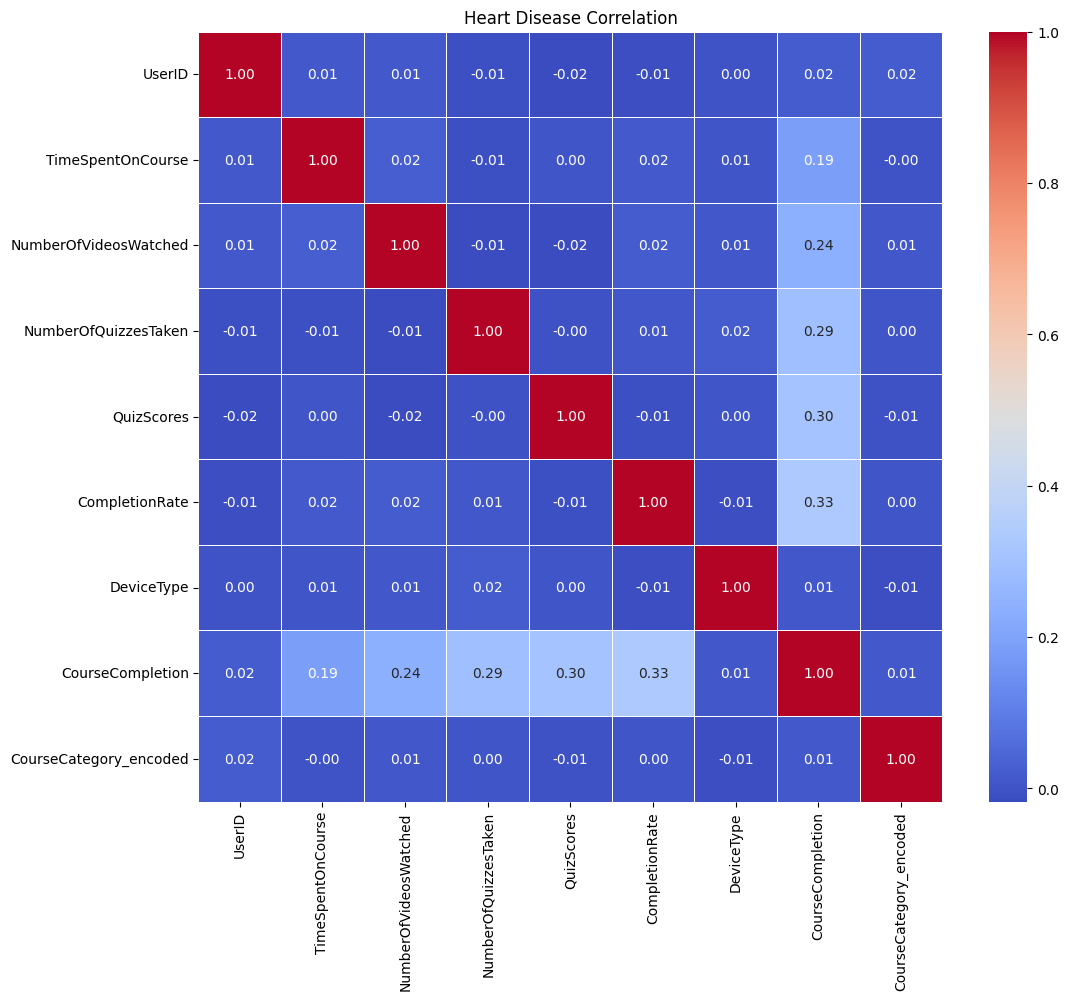

In [19]:
correlation_matrix = df_4.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Heart Disease Correlation')
plt.show()

In [20]:
correlation_matrix['CourseCompletion'].sort_values(ascending=False)

CourseCompletion          1.000000
CompletionRate            0.328800
QuizScores                0.304706
NumberOfQuizzesTaken      0.291650
NumberOfVideosWatched     0.239476
TimeSpentOnCourse         0.186399
UserID                    0.021000
CourseCategory_encoded    0.012604
DeviceType                0.008663
Name: CourseCompletion, dtype: float64

### Feature Selection

In [21]:
df_5 = df_4.drop(columns=['DeviceType', 'CourseCategory_encoded','UserID'])
df_5

,TimeSpentOnCourse,NumberOfVideosWatched,NumberOfQuizzesTaken,QuizScores,CompletionRate,CourseCompletion
0,29.979719,17,3,50.365656,20.860773,0
1,27.802640,1,5,62.615970,65.632415,0
2,86.820485,14,2,78.458962,63.812007,1
3,35.038427,17,10,59.198853,95.433162,1
4,92.490647,16,0,98.428285,18.102478,0
...,...,...,...,...,...,...
8995,37.445225,14,4,54.469359,32.990704,0
8996,48.631443,7,7,59.413257,0.254625,0
8997,38.212512,3,3,69.508297,70.188159,0
8998,70.048665,13,10,79.655182,72.975225,1


## Splitting Data and Feature Scalling

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X = df_5.drop(columns=['CourseCompletion'])
Y = df_5['CourseCompletion']

scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

X_normalized = pd.DataFrame(X_normalized, columns =X.columns)
X_train, X_test, Y_train, Y_test = train_test_split(X_normalized, Y, test_size = 0.2, random_state = 42)



In [23]:
X_normalized

,TimeSpentOnCourse,NumberOfVideosWatched,NumberOfQuizzesTaken,QuizScores,CompletionRate
0,0.292709,0.85,0.3,0.007212,0.208576
1,0.270716,0.05,0.5,0.252268,0.656425
2,0.866932,0.70,0.2,0.569192,0.638216
3,0.343814,0.85,1.0,0.183912,0.954521
4,0.924213,0.80,0.0,0.968660,0.180985
...,...,...,...,...,...
8118,0.368128,0.70,0.4,0.089303,0.329911
8119,0.481134,0.35,0.7,0.188201,0.002454
8120,0.375879,0.15,0.3,0.390143,0.701996
8121,0.697498,0.65,1.0,0.593121,0.729875


In [24]:
Y

0       0
1       0
2       1
3       1
4       0
       ..
8995    0
8996    0
8997    0
8998    1
8999    0
Name: CourseCompletion, Length: 8123, dtype: int64

# MODEL DEVELOPMENT

In the machine learning model development phase, 5 models will be used to provide classification results from existing data. The following 5 machine learning models will be used: 
1. Decision Tree
2. Support Vector Machine (Classifier)
3. Random Forest
4. Gaussian Naive Bayes
5. Gradient Boosting Classifier

After training on these models, the model evaluation process such as confusion matrix, learning curve and cross validation will be performed. The model with the best cross-validation score will be subjected to hyper-parameter tuning process to get the best hyper-parameter and display the best score.

## Decision Tree

In [25]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score

In [26]:
from sklearn.tree import DecisionTreeClassifier
model_1 = DecisionTreeClassifier(criterion='gini', splitter= 'best', max_depth=4)
model_1.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=4)

In [27]:
Y_pred_model_1 = model_1.predict(X_test)
accuracy_score(Y_pred_model_1, Y_test)

0.904

In [28]:
print(classification_report(Y_pred_model_1, Y_test))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91       822
           1       0.94      0.86      0.90       803

    accuracy                           0.90      1625
   macro avg       0.91      0.90      0.90      1625
weighted avg       0.91      0.90      0.90      1625



## Support Vector Machine

In [29]:
from sklearn.svm import SVC
model_2 = SVC()
model_2.fit(X_train, Y_train)

SVC()

In [30]:
Y_pred_model_2 = model_2.predict(X_test)
accuracy_score(Y_pred_model_2, Y_test)

0.8953846153846153

In [31]:
print(classification_report(Y_pred_model_2, Y_test))

              precision    recall  f1-score   support

           0       0.93      0.89      0.91       934
           1       0.86      0.91      0.88       691

    accuracy                           0.90      1625
   macro avg       0.89      0.90      0.89      1625
weighted avg       0.90      0.90      0.90      1625



## Random Forest

In [32]:
from sklearn.ensemble import RandomForestClassifier
model_3 = RandomForestClassifier(n_estimators= 100, random_state= 42)
model_3.fit(X_train, Y_train)

RandomForestClassifier(random_state=42)

In [33]:
Y_pred_model_3 = model_3.predict(X_test)
accuracy_score(Y_pred_model_3, Y_test)

0.9593846153846154

In [34]:
print(classification_report(Y_pred_model_3, Y_test))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96       922
           1       0.94      0.97      0.95       703

    accuracy                           0.96      1625
   macro avg       0.96      0.96      0.96      1625
weighted avg       0.96      0.96      0.96      1625



## Gaussian Naive Bayes

In [35]:
from sklearn.naive_bayes import GaussianNB
model_4 = GaussianNB()
model_4.fit(X_train, Y_train)

GaussianNB()

In [36]:
Y_pred_model_4 = model_4.predict(X_test)
accuracy_score(Y_pred_model_4, Y_test)

0.8233846153846154

In [37]:
print(classification_report(Y_pred_model_4, Y_test))

              precision    recall  f1-score   support

           0       0.89      0.81      0.85       987
           1       0.74      0.85      0.79       638

    accuracy                           0.82      1625
   macro avg       0.82      0.83      0.82      1625
weighted avg       0.83      0.82      0.83      1625



## Gradient Boosting Classifier

In [38]:
from sklearn.ensemble import GradientBoostingClassifier
model_5 = GradientBoostingClassifier()
model_5.fit(X_train, Y_train)

GradientBoostingClassifier()

In [39]:
Y_pred_model_5 = model_5.predict(X_test)
accuracy_score(Y_pred_model_5,Y_test)

0.96

In [40]:
print(classification_report(Y_test, Y_pred_model_5))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96       894
           1       0.97      0.94      0.95       731

    accuracy                           0.96      1625
   macro avg       0.96      0.96      0.96      1625
weighted avg       0.96      0.96      0.96      1625



# MODEL EVALUATION

## Confusion Matrix

### Decision Tree

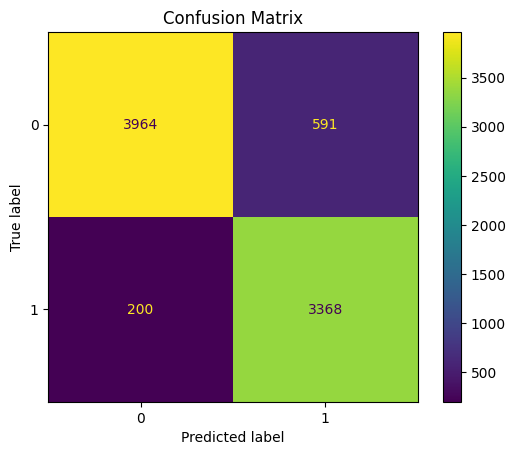

In [41]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

df_classification_1 = df_5.copy()
df_classification_1['Predicted_CourseCompletion'] = model_1.predict(X_normalized)

cm = confusion_matrix(df_classification_1['CourseCompletion'], df_classification_1['Predicted_CourseCompletion'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Confusion Matrix')
plt.show()

1. True Negatives (TN): 3867
> Number of negative cases correctly predicted by the model.
> Located in cell (0, 0).

2. False Positives (FP): 688
> Number of negative cases predicted as positive by the model.
> Located in cell (0, 1).

3. False Negatives (FN): 43
> Number of positive cases predicted as negative by the model.
> Located in cell (1, 0).

4. True Positives (TP): 3525
> Number of positive cases correctly predicted by the model.
> Located in cell (1, 1).

### Support Vector Machine

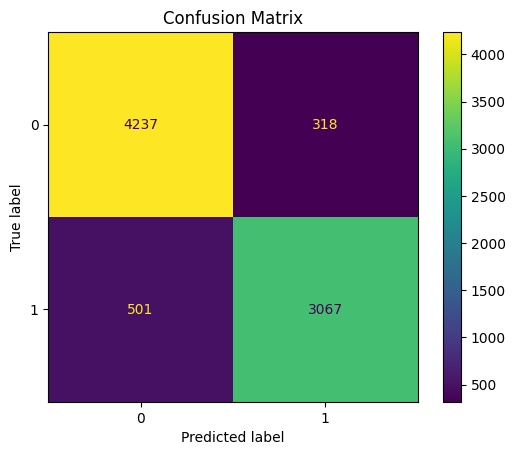

In [42]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

df_classification_2 = df_5.copy()
df_classification_2['Predicted_CourseCompletion'] = model_2.predict(X_normalized)

cm = confusion_matrix(df_classification_2['CourseCompletion'], df_classification_2['Predicted_CourseCompletion'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Confusion Matrix')
plt.show()

1. True Negatives (TN): 4107
> Number of negative cases correctly predicted by the model.
> Located in cell (0, 0).

2. False Positives (FP): 448
> Number of negative cases predicted as positive by the model.
> Located in cell (0, 1).

3. False Negatives (FN): 615
> Number of positive cases predicted as negative by the model.
> Located in cell (1, 0).

4. True Positives (TP): 2953
> Number of positive cases correctly predicted by the model.
> Located in cell (1, 1).

### Random Forest

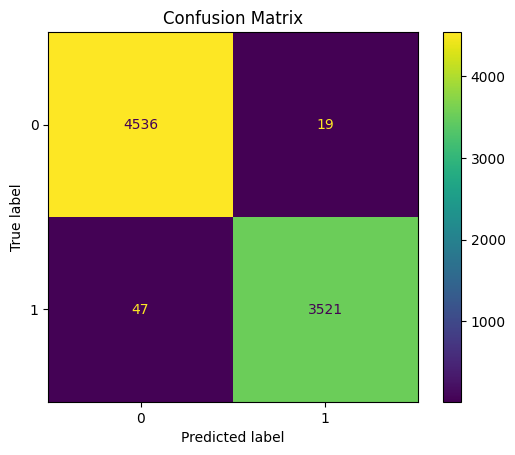

In [43]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

df_classification_3 = df_5.copy()
df_classification_3['Predicted_CourseCompletion'] = model_3.predict(X_normalized)

cm = confusion_matrix(df_classification_3['CourseCompletion'], df_classification_3['Predicted_CourseCompletion'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Confusion Matrix')
plt.show()

1. True Negatives (TN): 4528
> Number of negative cases correctly predicted by the model.
> Located in cell (0, 0).

2. False Positives (FP): 27
> Number of negative cases predicted as positive by the model.
> Located in cell (0, 1).

3. False Negatives (FN): 35
> Number of positive cases predicted as negative by the model.
> Located in cell (1, 0).

4. True Positives (TP): 3533
> Number of positive cases correctly predicted by the model.
> Located in cell (1, 1).

### Gaussian Naive Bayes

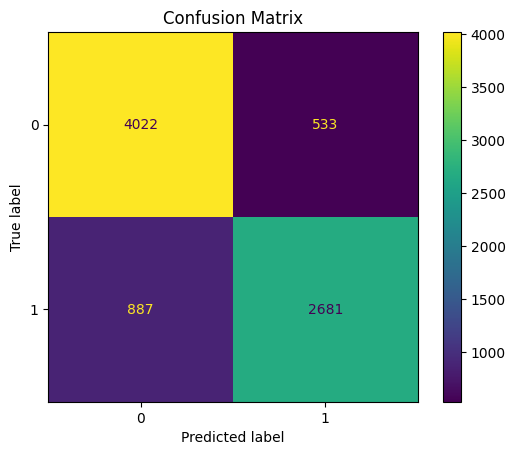

In [44]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

df_classification_4 = df_5.copy()
df_classification_4['Predicted_CourseCompletion'] = model_4.predict(X_normalized)

cm = confusion_matrix(df_classification_4['CourseCompletion'], df_classification_4['Predicted_CourseCompletion'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Confusion Matrix')
plt.show()

1. True Negatives (TN): 4023
> Number of negative cases correctly predicted by the model.
> Located in cell (0, 0).

2. False Positives (FP): 532
> Number of negative cases predicted as positive by the model.
> Located in cell (0, 1).

3. False Negatives (FN): 891
> Number of positive cases predicted as negative by the model.
> Located in cell (1, 0).

4. True Positives (TP): 2677
> Number of positive cases correctly predicted by the model.
> Located in cell (1, 1).

### Gradient Boosting Classifier

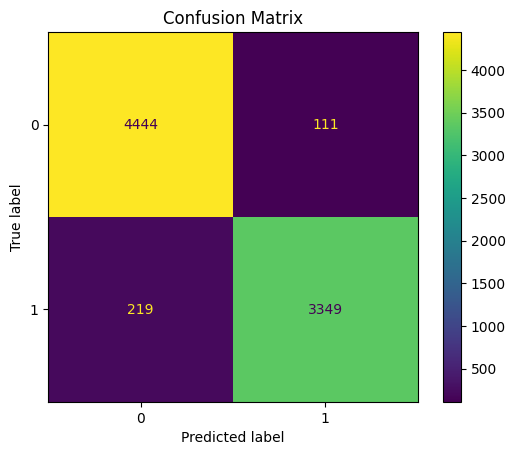

In [45]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

df_classification_5 = df_5.copy()
df_classification_5['Predicted_CourseCompletion'] = model_5.predict(X_normalized)

cm = confusion_matrix(df_classification_5['CourseCompletion'], df_classification_5['Predicted_CourseCompletion'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Confusion Matrix')
plt.show()

1. True Negatives (TN): 4414
> Number of negative cases correctly predicted by the model.
> Located in cell (0, 0).

2. False Positives (FP): 141
> Number of negative cases predicted as positive by the model.
> Located in cell (0, 1).

3. False Negatives (FN): 95
> Number of positive cases predicted as negative by the model.
> Located in cell (1, 0).

4. True Positives (TP): 3473
> Number of positive cases correctly predicted by the model.
> Located in cell (1, 1).

## Learning Curves

### Decision Tree

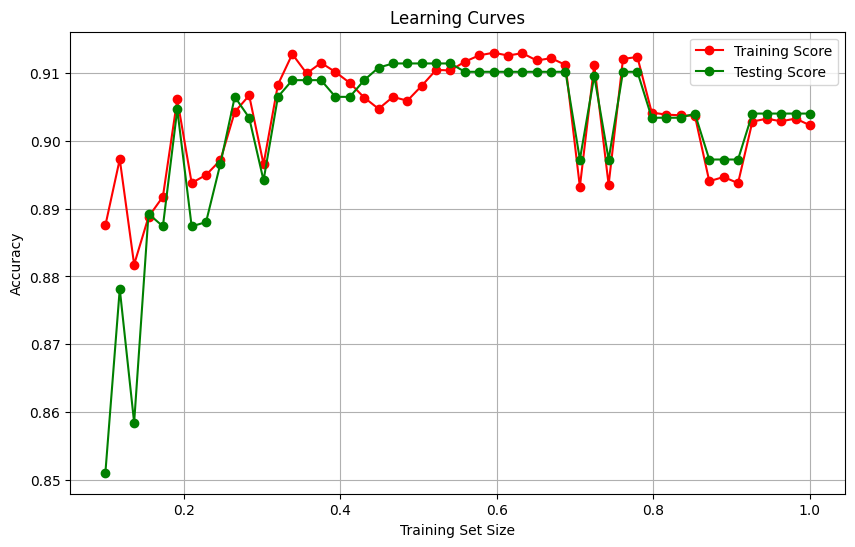

In [46]:
train_sizes = np.linspace(0.1, 1, 50)
learning_curve_train = []
learning_curve_test = []

clf = model_1

for train_size in train_sizes:
    num_samples = int(train_size * len(X_train))
    X_subset = X_train[:num_samples]
    y_subset = Y_train[:num_samples]

    clf.fit(X_subset, y_subset)

    y_pred_train = clf.predict(X_subset)
    acc_train = accuracy_score(y_subset, y_pred_train)
    learning_curve_train.append(acc_train)

    y_pred_test = clf.predict(X_test)
    acc_test = accuracy_score(Y_test, y_pred_test)
    learning_curve_test.append(acc_test)

# Plot Learning Curves
plt.figure(figsize=(10, 6))
plt.title('Learning Curves')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.grid()
plt.plot(train_sizes, learning_curve_train, 'o-', color="r", label="Training Score")
plt.plot(train_sizes, learning_curve_test, 'o-', color="g", label="Testing Score")
plt.legend(loc="best")
plt.show()

### Support Vector Machine

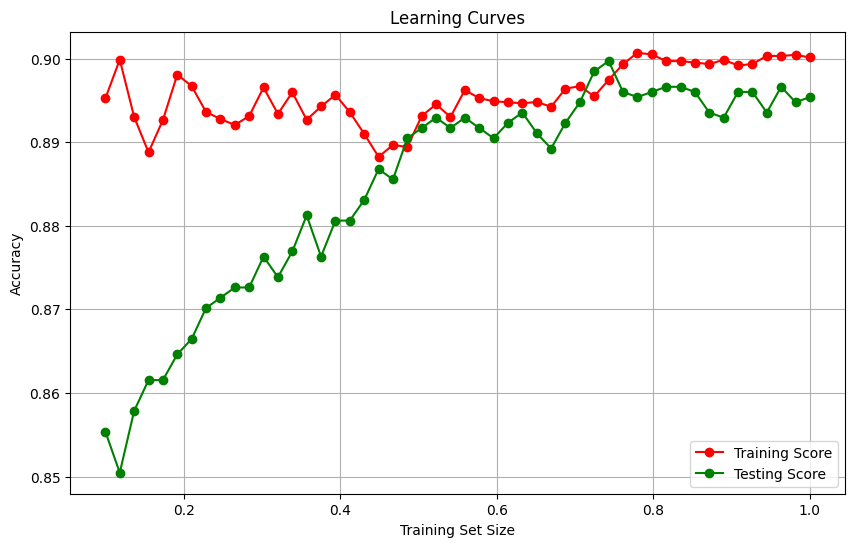

In [47]:
train_sizes = np.linspace(0.1, 1, 50)
learning_curve_train = []
learning_curve_test = []

clf = model_2

for train_size in train_sizes:
    num_samples = int(train_size * len(X_train))
    X_subset = X_train[:num_samples]
    y_subset = Y_train[:num_samples]

    clf.fit(X_subset, y_subset)

    y_pred_train = clf.predict(X_subset)
    acc_train = accuracy_score(y_subset, y_pred_train)
    learning_curve_train.append(acc_train)

    y_pred_test = clf.predict(X_test)
    acc_test = accuracy_score(Y_test, y_pred_test)
    learning_curve_test.append(acc_test)

# Plot Learning Curves
plt.figure(figsize=(10, 6))
plt.title('Learning Curves')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.grid()
plt.plot(train_sizes, learning_curve_train, 'o-', color="r", label="Training Score")
plt.plot(train_sizes, learning_curve_test, 'o-', color="g", label="Testing Score")
plt.legend(loc="best")
plt.show()

### Random Forest

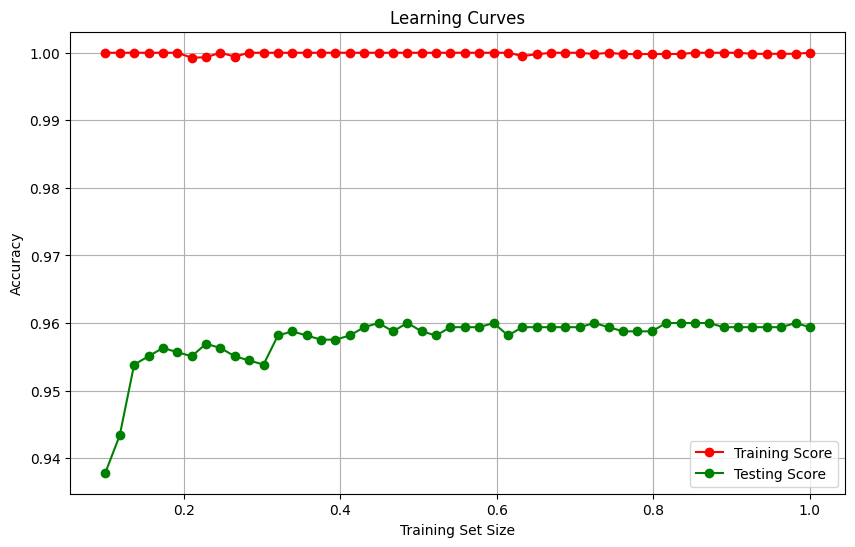

In [48]:
train_sizes = np.linspace(0.1, 1, 50)
learning_curve_train = []
learning_curve_test = []

clf = model_3

for train_size in train_sizes:
    num_samples = int(train_size * len(X_train))
    X_subset = X_train[:num_samples]
    y_subset = Y_train[:num_samples]

    clf.fit(X_subset, y_subset)

    y_pred_train = clf.predict(X_subset)
    acc_train = accuracy_score(y_subset, y_pred_train)
    learning_curve_train.append(acc_train)

    y_pred_test = clf.predict(X_test)
    acc_test = accuracy_score(Y_test, y_pred_test)
    learning_curve_test.append(acc_test)

# Plot Learning Curves
plt.figure(figsize=(10, 6))
plt.title('Learning Curves')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.grid()
plt.plot(train_sizes, learning_curve_train, 'o-', color="r", label="Training Score")
plt.plot(train_sizes, learning_curve_test, 'o-', color="g", label="Testing Score")
plt.legend(loc="best")
plt.show()

### Gaussian Naive Bayes

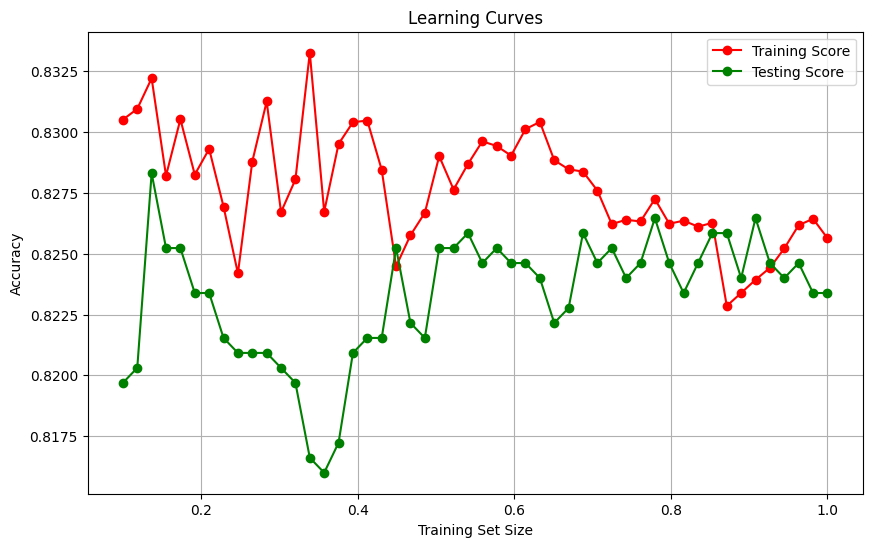

In [49]:
train_sizes = np.linspace(0.1, 1, 50)
learning_curve_train = []
learning_curve_test = []

clf = model_4

for train_size in train_sizes:
    num_samples = int(train_size * len(X_train))
    X_subset = X_train[:num_samples]
    y_subset = Y_train[:num_samples]

    clf.fit(X_subset, y_subset)

    y_pred_train = clf.predict(X_subset)
    acc_train = accuracy_score(y_subset, y_pred_train)
    learning_curve_train.append(acc_train)

    y_pred_test = clf.predict(X_test)
    acc_test = accuracy_score(Y_test, y_pred_test)
    learning_curve_test.append(acc_test)

# Plot Learning Curves
plt.figure(figsize=(10, 6))
plt.title('Learning Curves')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.grid()
plt.plot(train_sizes, learning_curve_train, 'o-', color="r", label="Training Score")
plt.plot(train_sizes, learning_curve_test, 'o-', color="g", label="Testing Score")
plt.legend(loc="best")
plt.show()

### Gradient Boosting Classifier

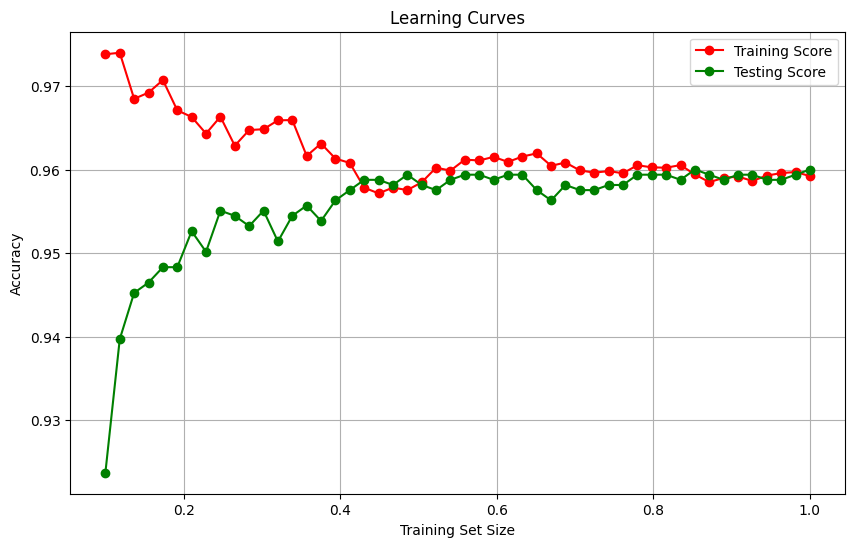

In [50]:
train_sizes = np.linspace(0.1, 1, 50)
learning_curve_train = []
learning_curve_test = []

clf = model_5

for train_size in train_sizes:
    num_samples = int(train_size * len(X_train))
    X_subset = X_train[:num_samples]
    y_subset = Y_train[:num_samples]

    clf.fit(X_subset, y_subset)

    y_pred_train = clf.predict(X_subset)
    acc_train = accuracy_score(y_subset, y_pred_train)
    learning_curve_train.append(acc_train)

    y_pred_test = clf.predict(X_test)
    acc_test = accuracy_score(Y_test, y_pred_test)
    learning_curve_test.append(acc_test)

# Plot Learning Curves
plt.figure(figsize=(10, 6))
plt.title('Learning Curves')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.grid()
plt.plot(train_sizes, learning_curve_train, 'o-', color="r", label="Training Score")
plt.plot(train_sizes, learning_curve_test, 'o-', color="g", label="Testing Score")
plt.legend(loc="best")
plt.show()

## Cross Validation

In [51]:
from sklearn.model_selection import KFold, cross_val_score

### Decision Tree

In [52]:
kf = KFold(n_splits=10, shuffle=True, random_state=42)
cv_scores_1 = cross_val_score(model_1, X_normalized, Y, cv=kf, scoring='accuracy')
print("Cross-validation scores:", cv_scores_1)
print("Mean CV score:", cv_scores_1.mean())

Cross-validation scores: [0.89544895 0.91143911 0.89052891 0.90394089 0.89408867 0.89408867
 0.9137931  0.88423645 0.90763547 0.89408867]
Mean CV score: 0.8989288895352008


### Support Vector Machine

In [53]:
kf = KFold(n_splits=10, shuffle=True, random_state=42)
cv_scores_2 = cross_val_score(model_2, X_normalized, Y, cv=kf, scoring='accuracy')
print("Cross-validation scores:", cv_scores_2)
print("Mean CV score:", cv_scores_2.mean())

Cross-validation scores: [0.89544895 0.89667897 0.89667897 0.89408867 0.89408867 0.87807882
 0.90517241 0.89408867 0.89285714 0.89901478]
Mean CV score: 0.8946196050630457


### Random Forest

In [54]:
kf = KFold(n_splits=10, shuffle=True, random_state=42)
cv_scores_3 = cross_val_score(model_3, X_normalized, Y, cv=kf, scoring='accuracy')
print("Cross-validation scores:", cv_scores_3)
print("Mean CV score:", cv_scores_3.mean())

Cross-validation scores: [0.95202952 0.96678967 0.95940959 0.95689655 0.96059113 0.94581281
 0.97167488 0.94704433 0.95566502 0.95812808]
Mean CV score: 0.9574041590169596


### Gaussian Naive Bayes

In [55]:
kf = KFold(n_splits=10, shuffle=True, random_state=42)
cv_scores_4 = cross_val_score(model_4, X_normalized, Y, cv=kf, scoring='accuracy')
print("Cross-validation scores:", cv_scores_4)
print("Mean CV score:", cv_scores_4.mean())

Cross-validation scores: [0.8204182  0.82902829 0.82902829 0.82512315 0.82142857 0.81650246
 0.84236453 0.81650246 0.80295567 0.84236453]
Mean CV score: 0.8245716164058192


### Gradient Boosting Classifier

In [56]:
kf = KFold(n_splits=10, shuffle=True, random_state=42)
cv_scores_5 = cross_val_score(model_5, X_normalized, Y, cv=kf, scoring='accuracy')
print("Cross-validation scores:", cv_scores_5)
print("Mean CV score:", cv_scores_5.mean())

Cross-validation scores: [0.95325953 0.96678967 0.95694957 0.95566502 0.96059113 0.94581281
 0.9729064  0.94827586 0.95812808 0.95566502]
Mean CV score: 0.9574043104963069


# MODEL COMPARISON

In [59]:
import pandas as pd
data_cv = {
    'Model': ['DT', 'SVC', 'RF', 'GNB', 'GBC'],
    'Accuracy': [0.8989288895352008, 0.8946196050630457, 0.9574041590169596, 0.8245716164058192, 0.9574043104963069]
}
df_comp = pd.DataFrame(data_cv)
df_comp.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy
4,GBC,0.957404
2,RF,0.957404
0,DT,0.898929
1,SVC,0.894620
3,GNB,0.824572


# HYPERPARAMETER TUNING

## Random Search

In [68]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

param_dist = {
    'n_estimators': randint(100, 501),
    'learning_rate': uniform(0.01, 0.19),
    'max_depth': randint(3, 8),
    'min_samples_split': randint(2, 16),
    'min_samples_leaf': randint(1, 7),
    'subsample': uniform(0.7, 0.3),
    'max_features': ['sqrt', 'log2', None]
}
random_search = RandomizedSearchCV(estimator=model_5, param_distributions=param_dist, n_iter=100, cv=5, scoring='accuracy', random_state=42, n_jobs=-1, error_score='raise')
random_search.fit(X_train, Y_train)
print(f"Best parameters found: {random_search.best_params_}")
print(f"Best cross-validation score: {random_search.best_score_}")


Best parameters found: {'learning_rate': 0.026119165676186468, 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 7, 'n_estimators': 244, 'subsample': 0.9841745732151576}
Best cross-validation score: 0.9573709954402796


In [70]:
# Evaluate the best model on the test set
best_model = random_search.best_estimator_
test_score = best_model.score(X_test, Y_test)
print(f"Test set score with best model: {test_score}")

Test set score with best model: 0.96


After performing several steps in the model development process, the model with the highest cross validation score is the **Gradient Boosting Classifier** and from the hyperparameter tuning process using random search, the best cross validation score and the best hyperparameters of the Gradient Boosting Classifier model have been obtained. 
The best cross-validation score and the best hyperparameters obtained are shown below: 

1. Best parameters found: {'learning_rate': 0.026119165676186468, 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 7, 'n_estimators': 244, 'subsample': 0. 9841745732151576}


2. Best cross-validation score: 0.9573709954402796